In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features4.csv')
df


,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,mfcc,zero_crossing_rate,English Type
0,0.351208,3487.395820,3665.246300,6548.753520,-16.105730,0.085826,0
1,0.518381,4489.976434,4567.835538,9700.060393,-9.443089,0.081952,0
2,0.398508,3484.886038,2659.198168,5587.160014,-16.786263,0.123342,0
3,0.404456,3368.354310,3496.116070,6045.886857,-12.001881,0.099111,1
4,0.402444,1560.972092,1770.163473,2994.105181,-13.093399,0.040951,1
...,...,...,...,...,...,...,...
2133,0.391682,2063.093516,1752.296651,3500.525549,-10.748590,0.071048,0
2134,0.381173,3715.435707,3141.827334,6324.752231,-9.148145,0.107324,0
2135,0.424373,2613.863420,2269.083768,4429.610437,-14.736230,0.090840,0
2136,0.383533,3969.889252,4233.557696,7913.680322,-8.775796,0.122074,0


In [3]:
del df['mfcc']
df

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,English Type
0,0.351208,3487.395820,3665.246300,6548.753520,0.085826,0
1,0.518381,4489.976434,4567.835538,9700.060393,0.081952,0
2,0.398508,3484.886038,2659.198168,5587.160014,0.123342,0
3,0.404456,3368.354310,3496.116070,6045.886857,0.099111,1
4,0.402444,1560.972092,1770.163473,2994.105181,0.040951,1
...,...,...,...,...,...,...
2133,0.391682,2063.093516,1752.296651,3500.525549,0.071048,0
2134,0.381173,3715.435707,3141.827334,6324.752231,0.107324,0
2135,0.424373,2613.863420,2269.083768,4429.610437,0.090840,0
2136,0.383533,3969.889252,4233.557696,7913.680322,0.122074,0


In [4]:
X = df.iloc[:,0:5]
y = df.iloc[:,5]


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

(1432, 5) (1432,)


In [7]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Define the autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 64
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=1450, batch_size=42,
                validation_data=(X_test_scaled, X_test_scaled))

# Extract the encoded representations
encoder = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

Epoch 1/1450
35/35 [==============================] - 2s 15ms/step - loss: 1.1005 - val_loss: 1.0703
Epoch 2/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.8945 - val_loss: 0.8939
Epoch 3/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.7648 - val_loss: 0.7982
Epoch 4/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.6959 - val_loss: 0.7495
Epoch 5/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.6585 - val_loss: 0.7209
Epoch 6/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.6355 - val_loss: 0.7025
Epoch 7/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.6199 - val_loss: 0.6896
Epoch 8/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.6086 - val_loss: 0.6799
Epoch 9/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.6001 - val_loss: 0.6725
Epoch 10/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5936 - val_loss: 0.666

35/35 [==============================] - 0s 4ms/step - loss: 0.5592 - val_loss: 0.6354
Epoch 83/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5592 - val_loss: 0.6354
Epoch 84/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5591 - val_loss: 0.6353
Epoch 85/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5591 - val_loss: 0.6353
Epoch 86/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5591 - val_loss: 0.6353
Epoch 87/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5590 - val_loss: 0.6352
Epoch 88/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5590 - val_loss: 0.6352
Epoch 89/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5590 - val_loss: 0.6352
Epoch 90/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5590 - val_loss: 0.6351
Epoch 91/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5589 - val_loss: 0.6351
Epoc

35/35 [==============================] - 0s 7ms/step - loss: 0.5578 - val_loss: 0.6340
Epoch 163/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5578 - val_loss: 0.6340
Epoch 164/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5578 - val_loss: 0.6340
Epoch 165/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5578 - val_loss: 0.6340
Epoch 166/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5578 - val_loss: 0.6340
Epoch 167/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5578 - val_loss: 0.6340
Epoch 168/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5577 - val_loss: 0.6339
Epoch 169/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5577 - val_loss: 0.6339
Epoch 170/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5577 - val_loss: 0.6339
Epoch 171/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5577 - val_loss: 0.

35/35 [==============================] - 0s 7ms/step - loss: 0.5571 - val_loss: 0.6332
Epoch 243/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5571 - val_loss: 0.6332
Epoch 244/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5570 - val_loss: 0.6332
Epoch 245/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5570 - val_loss: 0.6332
Epoch 246/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5570 - val_loss: 0.6332
Epoch 247/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5570 - val_loss: 0.6332
Epoch 248/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5570 - val_loss: 0.6332
Epoch 249/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5570 - val_loss: 0.6332
Epoch 250/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5570 - val_loss: 0.6332
Epoch 251/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5570 - val_loss: 0.

35/35 [==============================] - 0s 7ms/step - loss: 0.5567 - val_loss: 0.6328
Epoch 323/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5567 - val_loss: 0.6329
Epoch 324/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5567 - val_loss: 0.6328
Epoch 325/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5567 - val_loss: 0.6328
Epoch 326/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5567 - val_loss: 0.6328
Epoch 327/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5567 - val_loss: 0.6328
Epoch 328/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5567 - val_loss: 0.6328
Epoch 329/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5567 - val_loss: 0.6328
Epoch 330/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5567 - val_loss: 0.6328
Epoch 331/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5566 - val_loss: 0.

35/35 [==============================] - 0s 7ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 403/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 404/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 405/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 406/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 407/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 408/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 409/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 410/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 411/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5564 - val_loss: 0.

35/35 [==============================] - 0s 7ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 483/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 484/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 485/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 486/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 487/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 488/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 489/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 490/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 491/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5563 - val_loss: 0.

35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 563/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 564/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 565/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 566/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 567/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 568/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 569/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 570/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 571/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.

35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 643/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 644/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 645/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 646/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 647/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 648/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 649/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 650/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 651/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5562 - val_loss: 0.

35/35 [==============================] - 0s 9ms/step - loss: 0.5561 - val_loss: 0.6323
Epoch 723/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5561 - val_loss: 0.6323
Epoch 724/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5561 - val_loss: 0.6323
Epoch 725/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5561 - val_loss: 0.6323
Epoch 726/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5561 - val_loss: 0.6323
Epoch 727/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5561 - val_loss: 0.6323
Epoch 728/1450
35/35 [==============================] - 0s 8ms/step - loss: 0.5561 - val_loss: 0.6323
Epoch 729/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5561 - val_loss: 0.6323
Epoch 730/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5561 - val_loss: 0.6323
Epoch 731/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5561 - val_loss: 0.

35/35 [==============================] - 0s 6ms/step - loss: 0.5561 - val_loss: 0.6322
Epoch 803/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5561 - val_loss: 0.6322
Epoch 804/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5561 - val_loss: 0.6322
Epoch 805/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5561 - val_loss: 0.6322
Epoch 806/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5561 - val_loss: 0.6322
Epoch 807/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5561 - val_loss: 0.6322
Epoch 808/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5561 - val_loss: 0.6322
Epoch 809/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5561 - val_loss: 0.6322
Epoch 810/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5561 - val_loss: 0.6322
Epoch 811/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5561 - val_loss: 0.

35/35 [==============================] - 0s 7ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 883/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 884/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 885/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 886/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 887/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 888/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 889/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 890/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 891/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5560 - val_loss: 0.

35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 963/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 964/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 965/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 966/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 967/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 968/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 969/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 970/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 971/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.

35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1043/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1044/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1045/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1046/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1047/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1048/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1049/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1050/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1051/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val

35/35 [==============================] - 0s 5ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1122/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1123/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1124/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1125/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1126/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1127/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1128/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1129/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1130/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val

35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1201/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1202/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1203/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1204/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1205/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1206/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1207/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1208/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1209/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val

35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1280/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1281/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1282/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1283/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1284/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1285/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1286/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1287/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1288/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val

35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1359/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1360/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1361/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1362/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1363/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1364/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1365/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1366/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1367/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val

35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1438/1450
35/35 [==============================] - 0s 7ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1439/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1440/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1441/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1442/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1443/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1444/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1445/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val_loss: 0.6322
Epoch 1446/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5560 - val

In [9]:
#Train a classifier
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=100.0)
clf.fit(X_train_encoded, y_train)

# Evaluate the performance
y_pred = clf.predict(X_test_encoded)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.8371104815864022
Precision:  0.7838066874894072
Recall:  0.8371104815864022
F1-score:  0.7681327777819816
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       591
           1       0.50      0.02      0.03       115

    accuracy                           0.84       706
   macro avg       0.67      0.51      0.47       706
weighted avg       0.78      0.84      0.77       706



In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier()
history = model.fit(X_train_encoded, y_train)
#print(model)

y_pred = model.predict(X_test_encoded)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.16%


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


# Print classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.8116147308781869
Precision:  0.7511851440675803
Recall:  0.8116147308781869
F1-score:  0.7716577352333649
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       591
           1       0.28      0.10      0.14       115

    accuracy                           0.81       706
   macro avg       0.56      0.52      0.52       706
weighted avg       0.75      0.81      0.77       706



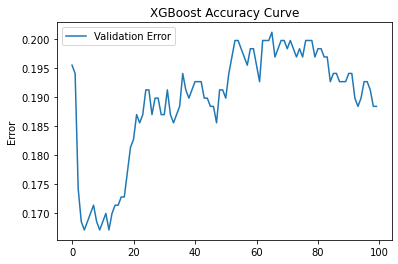

In [12]:
# Train the model and evaluate the accuracy on the validation set after each boosting round
results = model.fit(X_train_encoded, y_train, eval_set=[(X_test_encoded, y_test)], eval_metric='error', verbose=False)

# Plot the accuracy curve
epochs = len(results.evals_result()['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results.evals_result()['validation_0']['error'], label='Validation Error')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Accuracy Curve')
plt.show()

# CNN

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [14]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features4.csv')
del df['mfcc']
df


,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,English Type
0,0.351208,3487.395820,3665.246300,6548.753520,0.085826,0
1,0.518381,4489.976434,4567.835538,9700.060393,0.081952,0
2,0.398508,3484.886038,2659.198168,5587.160014,0.123342,0
3,0.404456,3368.354310,3496.116070,6045.886857,0.099111,1
4,0.402444,1560.972092,1770.163473,2994.105181,0.040951,1
...,...,...,...,...,...,...
2133,0.391682,2063.093516,1752.296651,3500.525549,0.071048,0
2134,0.381173,3715.435707,3141.827334,6324.752231,0.107324,0
2135,0.424373,2613.863420,2269.083768,4429.610437,0.090840,0
2136,0.383533,3969.889252,4233.557696,7913.680322,0.122074,0


In [15]:
# Split the data into training and testing sets

X = df.iloc[:,0:5]
y = df.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Convert the accent labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the accent labels to one-hot vectors
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

# Reshape the input features for the CNN
n_timesteps, n_features = X_train.shape[1], 1
X_train_reshaped = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))


In [17]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])



In [18]:
# Train the CNN
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train_reshaped, y_train_onehot, epochs=1300, batch_size=42,
                    validation_data=(X_test_reshaped, y_test_onehot))


Epoch 1/1300
41/41 [==============================] - 3s 20ms/step - loss: 41.2665 - accuracy: 0.6895 - val_loss: 0.7260 - val_accuracy: 0.7991
Epoch 2/1300
41/41 [==============================] - 0s 7ms/step - loss: 1.2476 - accuracy: 0.7181 - val_loss: 0.6105 - val_accuracy: 0.7360
Epoch 3/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.7819 - val_loss: 0.5129 - val_accuracy: 0.8294
Epoch 4/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.6204 - accuracy: 0.7906 - val_loss: 0.5383 - val_accuracy: 0.8294
Epoch 5/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.5658 - accuracy: 0.8111 - val_loss: 0.5029 - val_accuracy: 0.8294
Epoch 6/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.5073 - accuracy: 0.8246 - val_loss: 0.4805 - val_accuracy: 0.8294
Epoch 7/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.5127 - accuracy: 0.8205 - val_loss: 0.5003 - val_accuracy: 0.8294
Epoc

41/41 [==============================] - 0s 7ms/step - loss: 0.4652 - accuracy: 0.8240 - val_loss: 0.4573 - val_accuracy: 0.8294
Epoch 59/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4642 - accuracy: 0.8246 - val_loss: 0.4574 - val_accuracy: 0.8294
Epoch 60/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4644 - accuracy: 0.8246 - val_loss: 0.4574 - val_accuracy: 0.8294
Epoch 61/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4641 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 62/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4665 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 63/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 64/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 65/1300

41/41 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 116/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 117/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 118/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 119/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 120/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 121/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1

Epoch 172/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 173/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 174/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 175/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 176/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 177/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 178/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 229/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4653 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 230/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 231/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 232/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 233/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 234/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 235/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy:

Epoch 286/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 287/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 288/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 289/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 290/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 291/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 292/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 343/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 344/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 345/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 346/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4573 - val_accuracy: 0.8294
Epoch 347/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 348/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 349/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 400/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 401/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 402/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 403/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 404/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 405/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 406/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy:

Epoch 457/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 458/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 459/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 460/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 461/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 462/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 463/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 514/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 515/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 516/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 517/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 518/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 519/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 520/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy:

Epoch 571/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 572/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 573/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 574/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 575/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 576/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 577/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy:

Epoch 628/1300
41/41 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 629/1300
41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 630/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 631/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 632/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 633/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 634/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 685/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy: 0.8294
Epoch 686/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 687/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 688/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 689/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 690/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 691/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy:

Epoch 742/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 743/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 744/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 745/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 746/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 747/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 748/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy:

Epoch 799/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 800/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 801/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 802/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 803/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 804/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4652 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy: 0.8294
Epoch 805/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 856/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 857/1300
41/41 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 858/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 859/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 860/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy: 0.8294
Epoch 861/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 862/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy:

Epoch 913/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 914/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 915/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 916/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 917/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 918/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 919/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 970/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 971/1300
41/41 [==============================] - 0s 8ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 972/1300
41/41 [==============================] - 0s 5ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 973/1300
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 974/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 975/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 976/1300
41/41 [==============================] - 0s 5ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 1027/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1028/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1029/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1030/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 1031/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1032/1300
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1033/1300
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_ac

41/41 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1084/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1085/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1086/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 1087/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1088/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1089/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
E

41/41 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1140/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1141/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 1142/1300
41/41 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 1143/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 1144/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1145/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
E

41/41 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1196/1300
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy: 0.8294
Epoch 1197/1300
41/41 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1198/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1199/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 1200/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1201/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
E

41/41 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 1252/1300
41/41 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1253/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1254/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1255/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1256/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1257/1300
41/41 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
E

In [19]:
# Evaluate the performance
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Accuracy:", accuracy)

14/14 [==============================] - 0s 2ms/step
Accuracy: 0.8294392523364486


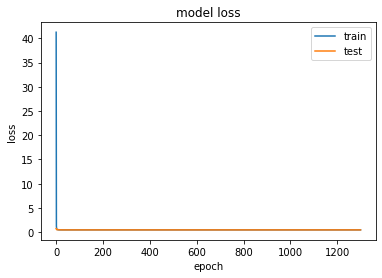

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

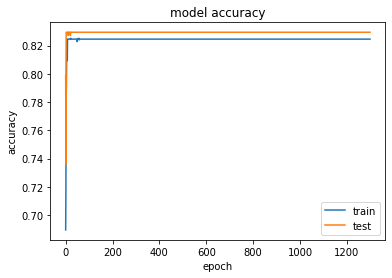

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [22]:
from pycm import ConfusionMatrix
from sklearn.metrics import plot_confusion_matrix, classification_report


print("Report : ", classification_report(y_test_encoded, y_pred_classes))

print(ConfusionMatrix(actual_vector=list(y_test_encoded),predict_vector=list(y_pred_classes)))

Report :                precision    recall  f1-score   support

           0       0.83      1.00      0.91       355
           1       0.00      0.00      0.00        73

    accuracy                           0.83       428
   macro avg       0.41      0.50      0.45       428
weighted avg       0.69      0.83      0.75       428

Predict   0         1         
Actual
0         355       0         

1         73        0         





Overall Statistics : 

95% CI                                                            (0.79381,0.86507)
ACC Macro                                                         0.82944
ARI                                                               0.0
AUNP                                                              0.5
AUNU                                                              0.5
Bangdiwala B                                                      0.82944
Bennett S                                                         0.65888
CBA               

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

print("Accuracy: ", accuracy_score(y_test_encoded, y_pred_classes))
print("Precision: ", precision_score(y_test_encoded, y_pred_classes, average='weighted'))
print("Recall: ", recall_score(y_test_encoded, y_pred_classes, average='weighted'))
print("F1-score: ", f1_score(y_test_encoded, y_pred_classes, average='weighted'))


# Print classification report
print(classification_report(y_test_encoded, y_pred_classes))

Accuracy:  0.8294392523364486
Precision:  0.6879694733164469
Recall:  0.8294392523364486
F1-score:  0.7521096668695767
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       355
           1       0.00      0.00      0.00        73

    accuracy                           0.83       428
   macro avg       0.41      0.50      0.45       428
weighted avg       0.69      0.83      0.75       428

